In [506]:
from PIL import Image

##### Stage-wise Additive method

made of up adding multiple weak learners with sequence.

- It is a Boosting Algorithm.


- It is a Weak Learner. That is accuracy is very less. Adaboost is amde up of many weak models resulting in powerful output.


- Decision Stump: Type of Weak learner with max_depth = 1 i.e split can be made on only single node.

    We will choose the split where entropy reduces the most i.e Information_gain is high.
    

- Classes are -1 and 1 instead of 0 and 1. +ve points is +1 and negative points is -1

$$h(x)\;=\;sign\;(\alpha_{1}*h_{1}(x))\;+\;(\alpha_{2}*h_{2}(x))\;+\;(\alpha_{3}*h_{3}(x))\;+\;....\;+\;(\alpha_{n}*h_{n}(x))\;$$

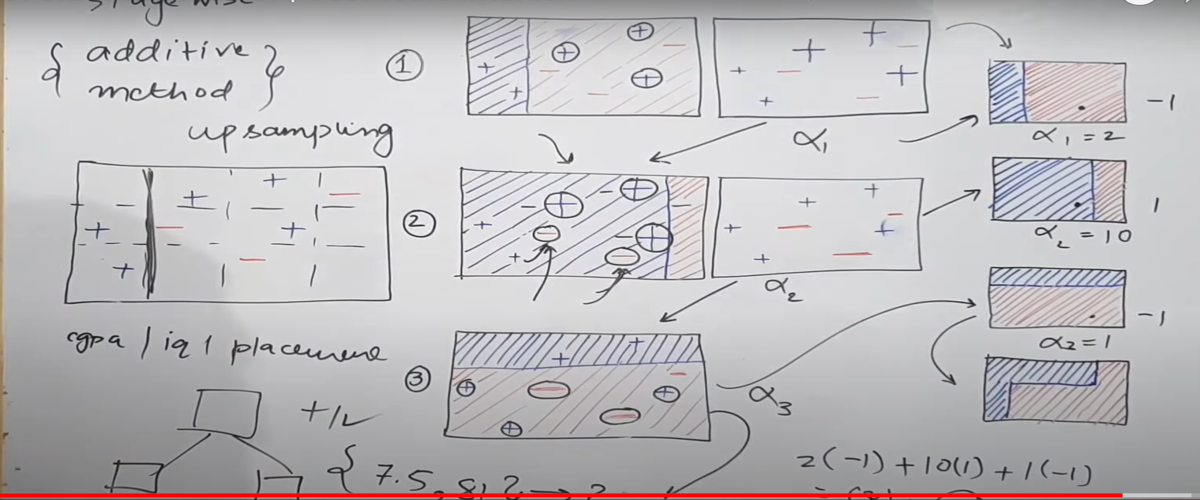

In [507]:
adaboost_notes1 = Image.open(r'C:\Users\mohit.kumar\Pictures\DS\notes_adaboost1.png')
adaboost_notes1.resize((1200,500))

<br></br>
$$weightage\;of\;model\;(\alpha)\;=\;\frac{1}{2}\;ln\;\bigg(\frac{1-error}{error}\bigg) $$


where error is sum of weightages of all the miscalssified rows.

#### Upsampling : 

we will increase the weight of misclassified rows and decrease the weight of correctly classified rows before sending it in the next stage.

The, weight of the entire model will be calculated as :

$$\Longrightarrow\;For\;Missclassified\;\longrightarrow\;new_{wt}\;=\;curr_{wt}\;*\;e^{\alpha_{1}}$$


$$\Longrightarrow\;For\;Correctly\;classified\;\longrightarrow\;new_{wt}\;=\;curr_{wt}\;*\;e^{- \alpha_{1}}$$

**Stage 1:** Training weak learner and getting the weightage of this stage in the final prediction

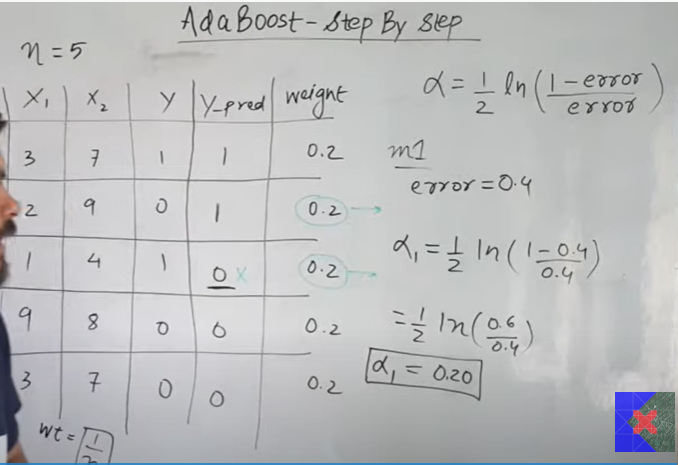

**Stage 2 :** Updating weightage of misclassified and classified points in updated column :

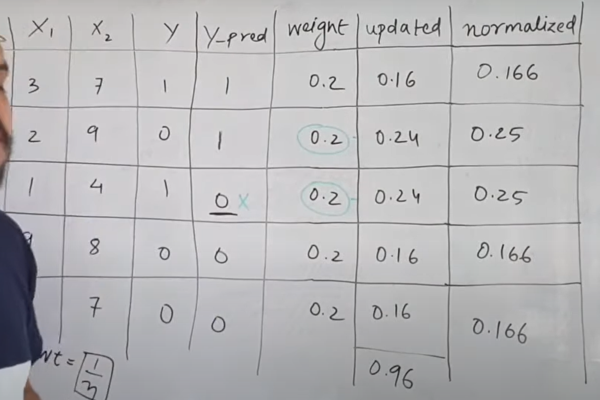

In [508]:
Image.open(r'C:\Users\mohit.kumar\Pictures\DS\notes_adaboost4.png').resize((600,400))

**Stage 3 :** Doing Upsampling: sending the information about the mistakes to the next stage. Boosting the missclassified points and creating range

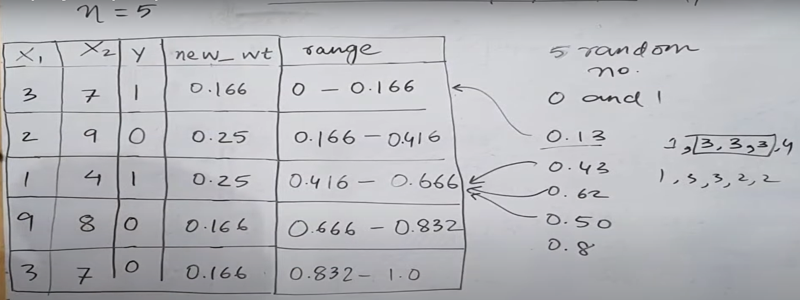

In [509]:
Image.open(r'C:\Users\mohit.kumar\Pictures\DS\notes_adaboost2.png').resize((800,300))

## Adaboost from scratch

In [510]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

pip install mlxtend --upgrade --no-deps

In [511]:
df = pd.DataFrame()

In [512]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [513]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

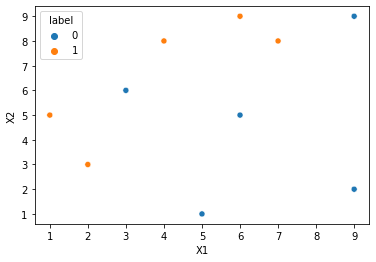

In [514]:
import seaborn as sns
sns.scatterplot(x=df['X1'], y = df['X2'], hue = df['label'])

In [515]:
df.shape

(10, 3)

**Step 1:** assigning equal weight to each rows

$$weight\;=\;\frac{1}{total\;number\;of\;rows}$$

In [516]:
df['weights'] = 1/df.shape[0]  # 1/total number of rows

In [517]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


**Step 2 :** Training Decision tree with max_depth = 1

In [518]:
from sklearn.tree import DecisionTreeClassifier

In [519]:
dt1 = DecisionTreeClassifier(max_depth=1) # max_depth will always be 1 as we are using decision stumps

In [520]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [521]:
X

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

In [522]:
X.shape

(10, 2)

In [523]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [524]:
y.shape

(10,)

In [525]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [526]:
dt1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

[Text(0.5, 0.75, 'X1 <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

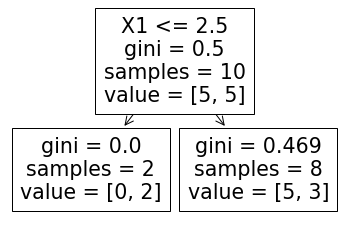

In [527]:
from sklearn.tree import plot_tree
plot_tree(dt1,feature_names=df.columns)

# decison stump is being create done on 2nd column

***

In [528]:
type(X)

numpy.ndarray

In [529]:
type(y)

numpy.ndarray

***

<AxesSubplot:>

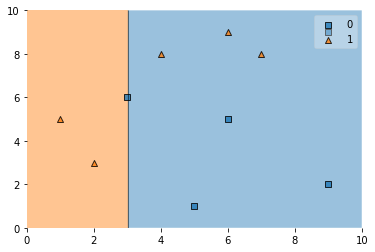

In [530]:
plot_decision_regions(X=X, y=y, clf=dt1)

In [531]:
df['y_pred'] = dt1.predict(X)

In [532]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


model is making 3 wrong predictions so that error i.e 0.1+0.1+0.1 = 0.3

#### calculating error:

In [533]:
def calculate_model_weight(error):
    
    return 0.5*np.log((1-error)/(error))

**Step 3 :** calculating model weight

In [534]:
# Model Weight

alpha1 = calculate_model_weight(0.3) # total error was 0.3
alpha1

0.42364893019360184

**Step 4 :** Boosting the weights of rows where there is misclassification

$$\Longrightarrow\;For\;Correctly\;classified\;\longrightarrow\;new_{wt}\;=\;curr_{wt}\;*\;e^{- \alpha_{1}}$$


$$\Longrightarrow\;For\;Missclassified\;\longrightarrow\;new_{wt}\;=\;curr_{wt}\;*\;e^{\alpha_{1}}$$




In [535]:
# Update weights

def update_row_weights(row, alpha = 0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [536]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [537]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [538]:
df['updated_weights'].sum()

# sum here is only 0.9165 not 1.

0.9165153319682015

**Step 5 :** Normalizing

In [539]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [540]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [541]:
df['normalized_weights'].sum()

1.0

**Step 6 :** Creating Range

In [542]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights']) # upper range

In [543]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,1.000000


In [544]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights'] # lower range

In [545]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [546]:
df = df[['X1','X2','label','weights','y_pred','updated_weights','normalized_weights','cumsum_lower','cumsum_upper']]

In [547]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [548]:
# creating new dataset and checking 10 results and collecting the wrognly predicted rows

def create_new_dataset(df):
    
    indices = []
    
    for  i in range(df.shape[0]):                # running loop for 10 times
        a = np.random.random()                   # each time generating random number
        for index, row in df.iterrows():         
            if row['cumsum_upper'] > a and a > row['cumsum_lower']: # checking where the random number is falling in the range
                indices.append(index) # appending index of that range in the indices
                
    return indices

In [549]:
index_values = create_new_dataset(df)

In [550]:
index_values # weight of those rows have increased where mistake is happening

[1, 5, 7, 6, 8, 0, 5, 9, 5, 3]

this is called Upsampling

In [551]:
second_df = df.iloc[index_values, [0,1,2,3]] # taking only first 4 columns

In [552]:
second_df

,X1,X2,label,weights
1,2,3,1,0.1
5,6,9,1,0.1
7,7,8,1,0.1
6,6,5,0,0.1
8,9,9,0,0.1
0,1,5,1,0.1
5,6,9,1,0.1
9,9,2,0,0.1
5,6,9,1,0.1
3,4,8,1,0.1


In [553]:
dt2 = DecisionTreeClassifier(max_depth=1) 

In [554]:
X = second_df.iloc[:,:2].values
y = second_df.iloc[:,2].values

In [555]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [556]:
dt2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

[Text(0.5, 0.75, 'X1 <= 8.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

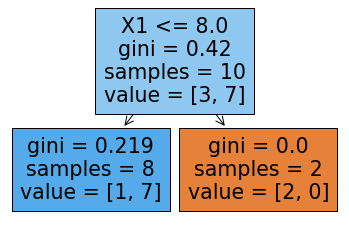

In [557]:
plot_tree(dt2, feature_names=second_df.columns,filled=True)

<AxesSubplot:>

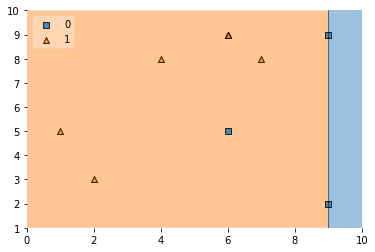

In [558]:
plot_decision_regions(X=X, y=y, clf=dt2, legend=2)

In [559]:
second_df['y_pred'] = dt2.predict(X)

In [560]:
second_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
5,6,9,1,0.1,1
7,7,8,1,0.1,1
6,6,5,0,0.1,1
8,9,9,0,0.1,0
0,1,5,1,0.1,1
5,6,9,1,0.1,1
9,9,2,0,0.1,0
5,6,9,1,0.1,1
3,4,8,1,0.1,1


**NOTE :**  if all the points are correctly predicted then change the error formula and put in denominator (error+0.000001)

0.5*np.log((1-error)/(error+0.000001))

In [561]:
alpha2 = calculate_model_weight(0.1)

In [562]:
alpha2

1.0986122886681098

In [563]:
# Update weights

def update_row_weights(row, alpha = 1.098): #update with new alpha value
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [564]:
second_df['update_weights'] = second_df.apply(update_row_weights,axis=1)

In [565]:
second_df

,X1,X2,label,weights,y_pred,update_weights
1,2,3,1,0.1,1,0.033354
5,6,9,1,0.1,1,0.033354
7,7,8,1,0.1,1,0.033354
6,6,5,0,0.1,1,0.299816
8,9,9,0,0.1,0,0.033354
0,1,5,1,0.1,1,0.033354
5,6,9,1,0.1,1,0.033354
9,9,2,0,0.1,0,0.033354
5,6,9,1,0.1,1,0.033354
3,4,8,1,0.1,1,0.033354


In [566]:
second_df['normalized_weights'] = second_df['update_weights']/second_df['update_weights'].sum()

In [567]:
second_df

,X1,X2,label,weights,y_pred,update_weights,normalized_weights
1,2,3,1,0.1,1,0.033354,0.055590
5,6,9,1,0.1,1,0.033354,0.055590
7,7,8,1,0.1,1,0.033354,0.055590
6,6,5,0,0.1,1,0.299816,0.499694
8,9,9,0,0.1,0,0.033354,0.055590
0,1,5,1,0.1,1,0.033354,0.055590
5,6,9,1,0.1,1,0.033354,0.055590
9,9,2,0,0.1,0,0.033354,0.055590
5,6,9,1,0.1,1,0.033354,0.055590
3,4,8,1,0.1,1,0.033354,0.055590


In [568]:
second_df['normalized_weights'].sum()

1.0

In [569]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [570]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [571]:
second_df = second_df[['X1','X2','label','weights','y_pred','update_weights','normalized_weights','cumsum_lower','cumsum_upper']]
second_df

,X1,X2,label,weights,y_pred,update_weights,normalized_weights,cumsum_lower,cumsum_upper
1,2,3,1,0.1,1,0.033354,0.055590,0.000000,0.055590
5,6,9,1,0.1,1,0.033354,0.055590,0.055590,0.111179
7,7,8,1,0.1,1,0.033354,0.055590,0.111179,0.166769
6,6,5,0,0.1,1,0.299816,0.499694,0.166769,0.666463
8,9,9,0,0.1,0,0.033354,0.055590,0.666463,0.722052
0,1,5,1,0.1,1,0.033354,0.055590,0.722052,0.777642
5,6,9,1,0.1,1,0.033354,0.055590,0.777642,0.833231
9,9,2,0,0.1,0,0.033354,0.055590,0.833231,0.888821
5,6,9,1,0.1,1,0.033354,0.055590,0.888821,0.944410
3,4,8,1,0.1,1,0.033354,0.055590,0.944410,1.000000


In [572]:
index_values = create_new_dataset(second_df)

In [573]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [574]:
third_df

,X1,X2,label,weights
5,6,9,1,0.1
5,6,9,1,0.1
0,1,5,1,0.1
9,9,2,0,0.1
1,2,3,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1


In [575]:
dt3 = DecisionTreeClassifier()

X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values


In [576]:
dt3.fit(X,y)

DecisionTreeClassifier()

In [577]:
dt3.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

[Text(0.5, 0.75, 'X1 <= 7.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

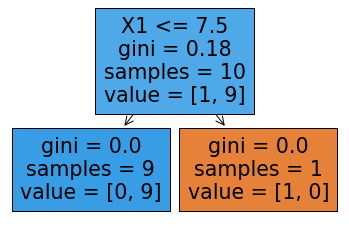

In [578]:
plot_tree(dt3,feature_names=third_df.columns,filled=True)

<AxesSubplot:>

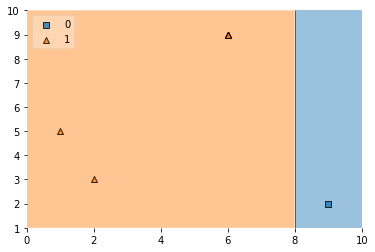

In [579]:
plot_decision_regions(X=X, y=y, clf=dt3, legend=2)

In [580]:
third_df['y_pred'] = dt3.predict(X)

In [581]:
third_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
5,6,9,1,0.1,1
0,1,5,1,0.1,1
9,9,2,0,0.1,0
1,2,3,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1


In [589]:
# changing the error as all the predictions are correct

def calculate_model_weight(error):
    
    return 0.5*np.log((1-error)/(error+0.00000001))

In [590]:
alpha3 = calculate_model_weight(0)

In [591]:
alpha3

9.210340371976184

In [600]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 9.210340371976184


### Prediction

In [593]:
df.head()

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458


In [607]:
df.loc[0]

X1                    1.000000
X2                    5.000000
label                 1.000000
weights               0.100000
y_pred                1.000000
updated_weights       0.065508
normalized_weights    0.071475
cumsum_lower          0.000000
cumsum_upper          0.071475
Name: 0, dtype: float64

In [596]:
query = np.array(df.iloc[0,:2]).reshape(1,2)


array([1], dtype=int64)

In [597]:
print("For 1,5 dt1 predicts: ", dt1.predict(query))
print("For 1,5 dt2 predicts: ", dt2.predict(query))
print("For 1,5 dt3 predicts: ", dt3.predict(query))

For 1,5 dt1 predicts:  [1]
For 1,5 dt2 predicts:  [1]
For 1,5 dt3 predicts:  [1]


as all the models predict it to be 1 and the true value is also 1. so all the $h(x)\;=\;1$

$$h\;(x)\;=\;sign\;(\alpha_{1}*h_{1}(x))\;+\;(\alpha_{2}*h_{2}(x))\;+\;(\alpha_{3}*h_{3}(x))\;+\;....\;+\;(\alpha_{n}*h_{n}(x))\;$$

In [601]:
alpha1*1 + alpha2*1 + alpha3*1

10.732601590837895

In [602]:
np.sign(10.732)

1.0

So output is 1 and the real output should also be 1

In [606]:
df.loc[4]

X1                    5.000000
X2                    1.000000
label                 0.000000
weights               0.100000
y_pred                0.000000
updated_weights       0.065508
normalized_weights    0.071475
cumsum_lower          0.380983
cumsum_upper          0.452458
Name: 4, dtype: float64

In [603]:
# checking for another data points

query = np.array(df.iloc[4,:2]).reshape(1,2)

In [604]:
print("For 5,1 dt1 predicts: ", dt1.predict(query))
print("For 5,1 dt2 predicts: ", dt2.predict(query))
print("For 5,1 dt3 predicts: ", dt3.predict(query))

For 1,5 dt1 predicts:  [0]
For 1,5 dt2 predicts:  [1]
For 1,5 dt3 predicts:  [1]


not all the models predicted it to be 1 and the true value was 1. so value of $h_{2}(x)\;and\;h_{3}(x)\;=\;1,\;h_{1}(x) = -1$

In [608]:
alpha1*(-1) + alpha2*1 + alpha3*(1)

9.885303730450692

In [609]:
np.sign(9.885)

1.0

So output is 1 and the real output should also be 1. Point is positive

***